In [1]:
# Structured Data - What you can fit to the Rows and the columns 
# (and Having Features and target)


# Predicting heart disease 
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Moedeling
6. Experimaintation

## 1. Problem Defination
In a statement,
> Predict wheater the patient having or not having heart deasies 

## 2. Data
use this https://www.kaggle.com/code/yousefzahran/heart-disease-prediction

## 3. Evaluation
> if we can reach 95% accuracy at predicting wheather or not a patient has heart diesease during the proof of the concept

## 4. Features

This is where you will get different types of the data 

# Data set
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [2]:
# Getting the requirements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# We want our plots to apper inside the notebook
# %matplotlib inline

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve


## Data

In [3]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data exploration (EDA - exploratary data analysis)

1. What questions are you trying to solve
2. what kind of data or we have and how 
3. missing data
4. Outlyers
5. how to change the data to get more accuracy

In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

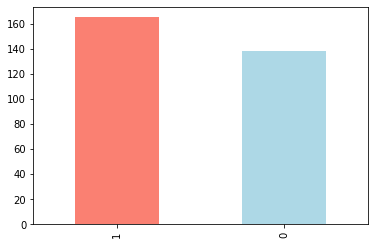

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue'])

In [6]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Comaire target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


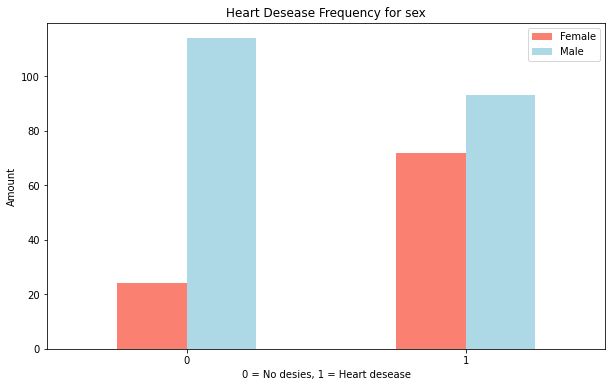

In [11]:
# Craeate a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                  color=['salmon','lightblue'])
plt.title("Heart Desease Frequency for sex")
plt.xlabel("0 = No desies, 1 = Heart desease")
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [12]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

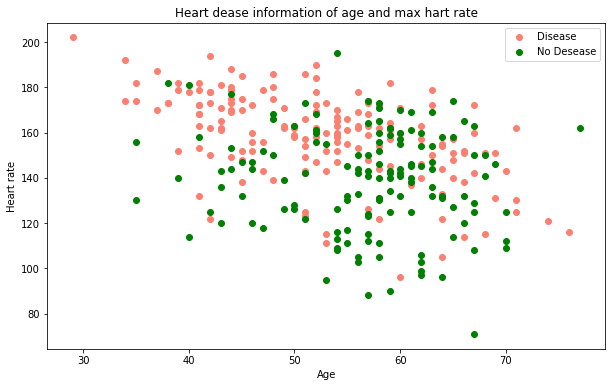

In [13]:
## age vs max heart rate for heart desease

# ctreate a figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon');

# Scatter with thw negative exapmles
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='green');

# add info

plt.title("Heart dease information of age and max hart rate")
plt.xlabel("Age")
plt.ylabel("Heart rate")
plt.legend(['Disease',"No Desease"]);

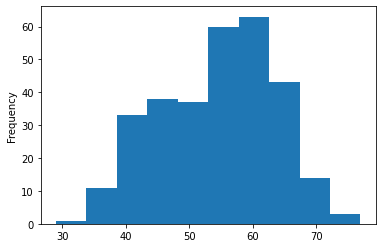

In [14]:
# Check the distribution of the age columns with a histo gram
df.age.plot.hist();

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


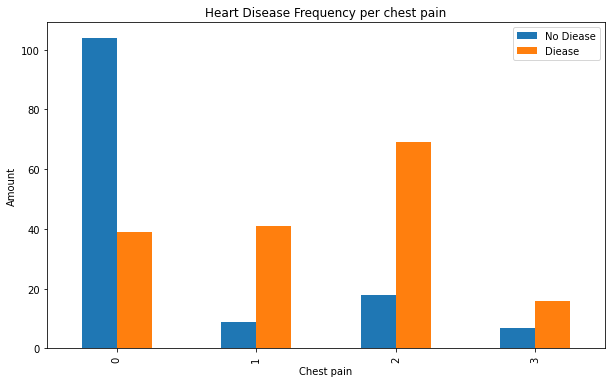

In [15]:
## Heart Disease Frequency per chest pain type (cp)
print(pd.crosstab(df.cp,df.target))
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,6));

plt.title("Heart Disease Frequency per chest pain")
plt.xlabel('Chest pain')
plt.ylabel('Amount')
plt.legend(['No Diease','Diease'])

In [16]:
# Building corilation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


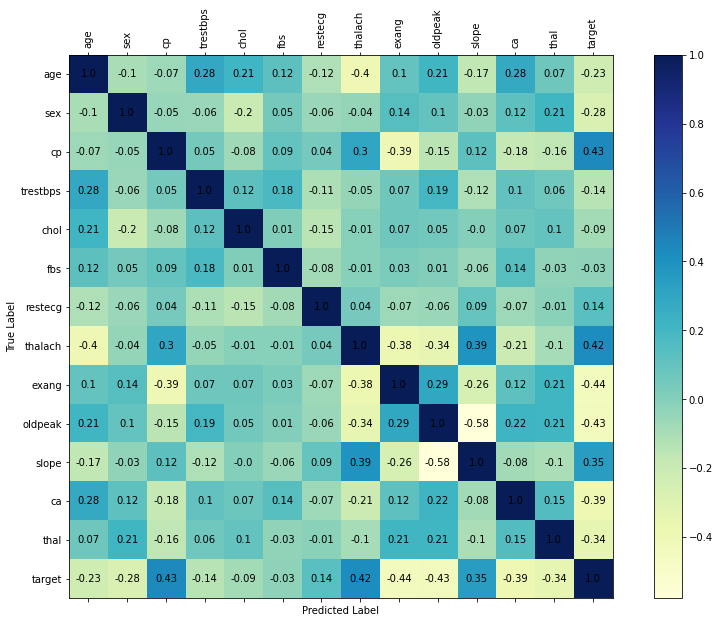

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame with the data
corr_matrix = df.corr()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Use imshow to display the correlation matrix
cax = ax.matshow(corr_matrix, cmap='YlGnBu')

# Add a color bar
fig.colorbar(cax)

# Set ticks to match the dataframe columns
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# Label the ticks with the dataframe column names
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Loop over data dimensions and create text annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha="center", va="center", color="black")

# Set axis labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()




### Machilearning Modeling

In [18]:
# Split data into x and y

x = df.drop('target',axis=1)
y = df['target']

In [19]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


### Wehave sucessfully devided our data noe get the ml model
### scikit-learn mapping 
### We are going to try 3 ml models
1. logistic Regression  *it is used for the classification*
2. k-nearest neighbour
3. Random forest classifier

In [20]:
# Put models in a dictionarty
models = {
    "Logistic Regression":LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}
# Create a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given models .
    models : a dict of differnt models in it
    x_tarin : traing data no labels
    y_tarin : training data no lebals
    x_test : test data lebels
    y_test : test data with teh lebels
    """
    # set the random seed
    np.random.seed(42)
    
    # Make a dict to keep the model scores
    model_scores = {}
    # Loop in to the model
    
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [21]:
### model compairision

<Axes: >

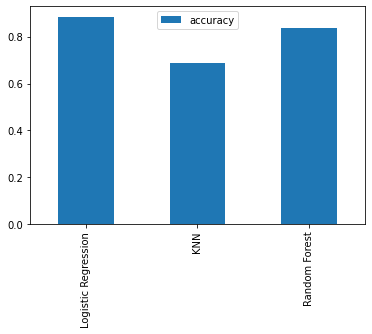

In [22]:
model_compaire = pd.DataFrame(model_scores, index=['accuracy'])
model_compaire.T.plot.bar()

# Now we got a baseline model 
# Do this:
1. Hyper parameter tuning
2. Feature importance
3. Confusion matrix
4. cross-validation
5. Precission
6. Recall
7. f2 score
8. Roc and AOc Curve
9. classification report

In [23]:
## Hyper Parameter tuning

train_scores = []
test_scores = []

# Craete a list of different values fro n_neighbors

neighbours = range(1,21)

# Setup KNN instance

knn = KNeighborsClassifier()

# Loop through the different n_neighbors

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [24]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum KNN score on the test data : 75.41%


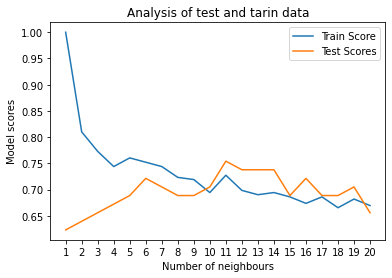

In [25]:
plt.title("Analysis of test and tarin data")
plt.plot(neighbours, train_scores, label="Train Score")
plt.plot(neighbours, test_scores, label="Test Scores")

plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model scores")
plt.legend();

print(f"Maximum KNN score on the test data : {max(test_scores)* 100 :.2f}%")

## Tunig Hyper parameters (Using inbuilt method)

#### Using RandomizedSearchCV

Tune :
* LogisticRegression()
* RaondomForestClassification()

In [26]:
# Craete a hyper parameter grid for LogisticRegression

# penalty='l2', *, dual=False, tol=0.0001, C=1.0,fit_intercept=True,
# intercept_scaling=1, class_weight=None,random_state=None, solver='lbfgs',
# max_iter=100, multi_class='deprecated',
# verbose=0, warm_start=False, n_jobs=None, l1_ratio=None

log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Craete a Hyper paarmeter grid for Random forest calssifier

rf_grid = {
    'n_estimators': np.arange(10,100,10),
    'max_depth' : [None,3,5,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}


In [27]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [28]:
rf_grid

{'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [29]:
# Using RandomizedCV Tune the Logistic regression

np.random.seed(42)

# Set up random hyperparameter search fro LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit the hyperparameter search model for LogisticRegression

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
# Check the best parameters

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [32]:
# Now we have LogisticRegression Lets do for the RandomForest Classifier
from joblib import dump
np.random.seed(42)

# SetUp random hyperparametr search fro the RandomForestClassifire

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit the model to the model
rs_rf.fit(x_train,y_train)

dump(rs_rf.best_estimator_, "random_forest_model.joblib")
print("Model saved as random_forest_model.joblib")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model saved as random_forest_model.joblib


In [33]:
# Best paramets for this
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [34]:
# Evaluate the Randomized search Randomized
rs_rf.score(x_test,y_test)

0.8852459016393442

In [35]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### By hand 
### RandomizedSearchV
### GridSearchCV (Use this now )

### Logistic Regression using grid search cv

* Scince Logistic regression model provides the best score now so far ,try and improve them using GridSearchCV

In [36]:
# Different hyperparameter for our Grid search cv for logistic regression

log_reg_grid = {
    'C': np.logspace(-4,4,30),
    'solver': ['liblinear']
}

# Set up grid hyperparameter search for the Logistic Regeression

gs_log_res = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# Fit the taining data to the model
gs_log_res.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
# Check the best hyper parameters
gs_log_res.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
# Evaluate the grid search LogisticRegression Model

gs_log_res.score(x_test,y_test)

0.8852459016393442

In [39]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluate our tuned ml classifier , beyond accuracy
* Roc curve and AUC score
* Confusion matrix
* Classification Report 
* Precission
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

To make Compairisions and evaluate our traind model, first we need to make predictions


In [40]:
y_preds = gs_log_res.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [41]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

# ROC

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


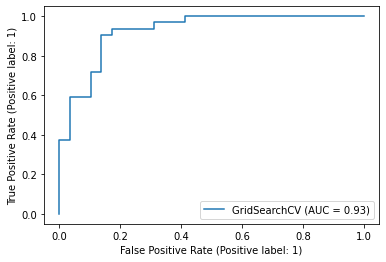

In [42]:
# import Roc
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_res,x_test,y_test);

In [43]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


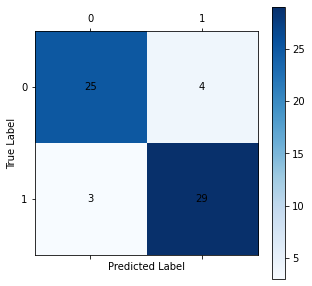

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using matplotlib's imshow()
    """
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_preds)
    
    fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the figure size
    # Display the confusion matrix
    cax = ax.matshow(cm, cmap=plt.cm.Blues)  # You can use different color maps
    fig.colorbar(cax)
    
    # Set labels for axes
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    # Add annotations
    for (i, j), val in np.ndenumerate(cm):
        plt.text(j, i, f'{val}', ha='center', va='center', color='black')

    # Adjusting the ticks and labels
    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_yticks(np.arange(cm.shape[0]))
    plt.show()

# Example usage with your test and prediction data
plot_conf_mat(y_test, y_preds)


In [45]:
# Classification report of one fold test data
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We'are going to calculate precission , recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()` of scikit-learn 

In [46]:
# Check best hyperparameter
gs_log_res.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# Create a new classifier with best parameters

clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [48]:
# Crossvalidated accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [49]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [50]:
# Crossvalidated precission
cv_precission = cross_val_score(clf,x,y,cv=5,
                               scoring='precision')
cv_precission = np.mean(cv_precission)
cv_precission

0.8215873015873015

In [51]:
# crossvalidated recall
cv_recall = cross_val_score(clf,x,y,cv=5,
                               scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [52]:
# Crossvalidated f1-score
cv_f1 = cross_val_score(clf,x,y,cv=5,
                               scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

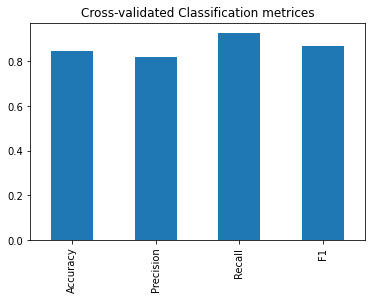

In [53]:
# Visualize cross-validate metrics
cv_metrices = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precission,
                           "Recall": cv_recall,
                           "F1": cv_f1},index=[0])
cv_metrices.T.plot.bar(title="Cross-validated Classification metrices",
                      legend=False);

### Feature importance

Which feature contributed most to the out comes of the model and how they contribute.

Finding feature importance is different for the different model

In [54]:
# Feature importance using logisttic regression
# lets  find the feature importance for Logistic regression
# 1. Logistic regression feature importance

In [55]:
# Fit an instance of LogisticRegression
gs_log_res.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [57]:
# Check coef_ = co-efficient contribute to the lebels

clf.coef_

array([[ 0.00316728, -0.86044622,  0.66067059, -0.01156993, -0.00166374,
         0.04386122,  0.31275815,  0.02459361, -0.60413062, -0.5686283 ,
         0.45051625, -0.63609881, -0.67663383]])

In [58]:
# match coef's of features to columns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775089892488,
 'sex': -0.8604462193284903,
 'cp': 0.6606705857793441,
 'trestbps': -0.01156993031867032,
 'chol': -0.0016637442407918324,
 'fbs': 0.04386122408903933,
 'restecg': 0.31275815497333875,
 'thalach': 0.024593612835517458,
 'exang': -0.6041306248075571,
 'oldpeak': -0.5686282991341255,
 'slope': 0.4505162464116119,
 'ca': -0.6360988070697587,
 'thal': -0.6766338279094292}

<Axes: title={'center': 'Feature Importance'}>

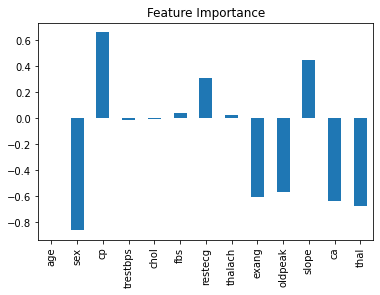

In [59]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [60]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [61]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimaintaion

if you hit the evaluation metrix yet... ask yourself

* Could you collet more data,
* Could you try a better model? Like CatBoost and XGBoost?
* Could you improve the current models ? 
* how you export it and share it with others

In [62]:
import h5py

# Save the serialized model into an HDF5 file
with h5py.File("random_forest_model.h5", "w") as h5f:
    with open("random_forest_model.joblib", "rb") as model_file:
        serialized_model = model_file.read()
        h5f.create_dataset("random_forest", data=np.void(serialized_model))

print("Model saved as random_forest_model.h5")


Model saved as random_forest_model.h5
